In [ ]:
import gc, tensorflow as tf
gc.collect()
tf.keras.backend.clear_session()


In [1]:
import tensorflow as tf
import keras as kr
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [4]:
trainX.shape

(60000, 28, 28)

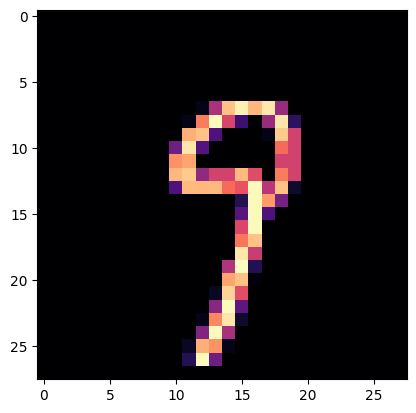

In [5]:
imageNum = 1500
plt.imshow(trainX[imageNum], cmap='magma')

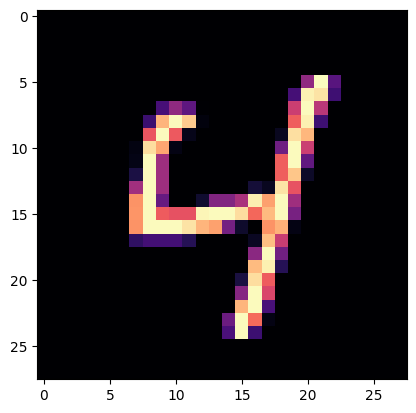

In [6]:
imageNum = 3332
plt.imshow(testX[imageNum], cmap='magma')

In [7]:
CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

D:\cnn\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Layer (type)          ┃ Output Shape    ┃  Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ conv2d (Conv2D)       │ (None, 26, 26,  │      320 │
│                       │ 32)             │          │
├───────────────────────┼─────────────────┼──────────┤
│ max_pooling2d         │ (None, 13, 13,  │        0 │
│ (MaxPooling2D)        │ 32)             │          │
├───────────────────────┼─────────────────┼──────────┤
│ conv2d_1 (Conv2D)     │ (None, 11, 11,  │   18,496 │
│                       │ 64)             │          │
├───────────────────────┼─────────────────┼──────────┤
│ max_pooling2d_1       │ (None, 5, 5,    │        0 │
│ (MaxPooling2D)        │ 64)             │          │
├───────────────────────┼─────────────────┼──────────┤
│ flatten (Flatten)     │ (None, 1600)    │        0 │
├───────────────────────┼─────────────────┼──────────┤
│ dense (Dense)         │ (None, 128)     │  204,928 │
├───────────────────────┼─────────────────┼──────────┤
│ dense_1 (Dense)       │ (None, 10)      │    1,290 │
└───────────────────────┴─────────────────┴──────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
CNN_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [10]:
CNN_model.fit(x=trainX,y=trainY, epochs=10, verbose=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9948 - loss: 0.0187


In [11]:
CNN_model.evaluate(testX, testY)
# 98% Accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0588


[0.05880452319979668, 0.9850000143051147]

In [ ]:
CNN_model.save("CNN_225k_param_model.keras")